# Pre-process Data

author: Binbin Zhu

This page show the combination of 520 raw data files into one file.

In [1]:
pip install peakutils

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import peakutils


## Define smooth function and baseline correction fuction

I used moving average to smooth the data and only keep the data of the wavelength between 500 and 2000.

In [3]:
# Define a function to smooth data by moving average
def smooth(data):
    rolling_average = data.rolling(window=10).mean()
    smoothed_data = rolling_average.drop(rolling_average[(rolling_average.index >= 2000 )| (rolling_average.index <= 500)].index)
    return smoothed_data

I used polynomial fitting method to correct baseline. The Baseline estimation algorithm is peakutils.baseline( ), which computes the baseline of a given data. Then, the data minus the baseline value to get corrected values.

In [4]:
# Define a function to correct baseline by polynomial fitting method
def baseline_correction(data):
    baseline_value = peakutils.baseline(data)
    baseline_corrected=data-baseline_value
    return baseline_corrected

## Combine data

I combined all raw negative and positive data separately. Then, the spectral data was denoised by the function I defined. Negative dataframe contains 280 rows x 1556 columns. Positive dataframe contains 240 x 1556 columns. I also added one row to indicate the diagnosis, negative or positive. Finally, there are 1557 columns.

In [5]:
# Combine all negatives into one
path_neg = ['19-441C', '19-442C', '19-445C', '19-447C', '19-448C', '19-450C', '19-452C', '19-453C', '19-455C', '19-456C', '19-460C','19-462C', '19-483C', '19-512C']
neg = []
for i in path_neg:
    files = glob.glob(os.path.join(i, '*.CSV'))
    combined = pd.concat((pd.read_csv(f, index_col=0, header=None) for f in files), axis=1, ignore_index=True)   
    neg.append(combined)
all_neg = pd.concat(neg, axis=1, ignore_index=True)

col = len(all_neg.columns)

frames=[]
for i in range(0,col):
    data=smooth(all_neg.iloc[:,[i]])
    data=baseline_correction(data)
    data=data.transpose()
    frames.append(data)
denoised_neg = pd.concat(frames, ignore_index=True)
denoised_neg['diagnosis'] = 'N'
denoised_neg.shape

(280, 1557)

In [6]:
# Combine all positive into one
path_pos = ['19-443C+', '19-444C+', '19-446C+', '19-449C+', '19-451C+', '19-454C+', '19-457C+', '19-458C+', '19-459C+', '19-461C+', '19-464C+', '19-511C+']
pos = []
for i in path_pos:
    files = glob.glob(os.path.join(i, '*.CSV'))  
    combined = pd.concat((pd.read_csv(f, index_col=0, header=None) for f in files), axis=1, ignore_index=True)   
    pos.append(combined)
all_pos = pd.concat(pos, axis=1, ignore_index=True)

col = len(all_pos.columns)

frames=[]
for i in range(0,col):
    data=smooth(all_pos.iloc[:,[i]])
    data=baseline_correction(data)
    data=data.transpose()
    frames.append(data)
denoised_pos = pd.concat(frames, ignore_index=True)
denoised_pos['diagnosis'] = 'P'
denoised_pos.shape

(240, 1557)

Combine negative and positive together and save into a new csv file, named as all_denoised_data.csv.

In [7]:
# Combine all of raw spectral data
all_data = pd.concat([all_neg, all_pos], ignore_index=True)
all_data.to_csv('all_data.csv')
# Combine all of denoised negative and positive
all_denoised_data = pd.concat([denoised_neg, denoised_pos], ignore_index=True)
all_denoised_data.to_csv('all_denoised_data.csv')
all_denoised_data

,500.0762,501.0404,502.0046,502.9689,503.9331,504.8973,505.8616,506.8258,507.79,508.7543,...,1991.745,1992.7089999999998,1993.674,1994.638,1995.602,1996.566,1997.531,1998.495,1999.4589999999998,diagnosis
0,6.912136,7.084841,7.170923,7.215454,7.426048,7.707769,7.848141,7.678183,7.259665,6.762577,...,5.075347,4.543261,4.141064,3.736256,3.433924,3.556222,3.953178,4.199164,4.208598,N
1,5.832965,6.301765,6.617768,6.819559,6.918178,6.932343,6.876840,6.781932,6.733976,6.927481,...,8.879041,8.316635,8.434410,8.865132,9.134195,9.440233,9.898358,10.186567,10.171124,N
2,7.495793,7.172395,6.879784,6.558619,6.117016,5.610619,5.194107,5.030549,5.200204,5.534339,...,6.153043,5.525227,4.958487,4.958721,5.152856,5.007717,4.554685,3.903759,3.155657,N
3,8.845781,8.810334,8.844809,8.993542,9.290348,9.644815,9.945519,10.143299,10.244697,10.163157,...,1.281216,1.195737,1.010073,0.857662,0.793548,0.835772,0.935497,0.867499,0.606258,N
4,5.070889,5.226716,5.228550,5.266936,5.384740,5.565348,5.808475,6.160908,6.588756,6.847104,...,10.285013,10.439068,10.397775,10.461218,10.815531,11.280892,11.557407,11.434160,10.925841,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,3.308156,2.934600,2.848093,2.884663,2.864884,2.905527,3.127921,3.557605,4.330557,6.579578,...,11.462694,11.800260,11.885252,11.497851,10.865798,10.633373,11.041305,11.811816,12.384402,P
516,5.861541,5.494428,4.764644,4.201603,4.141369,4.461002,4.811173,4.912287,4.732698,4.346450,...,7.915571,8.957623,9.709398,9.947636,10.154612,10.643705,11.084926,11.229930,11.203247,P
517,8.898219,8.712005,8.514024,8.487139,8.536405,8.569716,8.487386,8.325846,8.262217,8.260288,...,7.604452,7.635101,7.596555,7.313001,6.791455,6.160038,5.542555,5.004899,4.686116,P
518,8.426700,8.511633,8.781884,9.100584,9.213795,9.146680,9.035743,9.028848,9.182338,9.552799,...,1.748844,1.343686,0.991888,0.914002,0.836117,0.701102,0.693260,0.763645,0.689986,P


## Plot denoised data

Check the individual denoised spectra for different samples by changing columns number. I did not plot all spectrum in one figure because they are too much and difficult to see.

Text(0, 0.5, 'Raman Intensity (cps)')

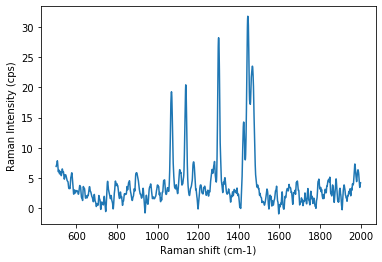

In [8]:
import seaborn as sns
X = all_denoised_data.drop(columns='diagnosis')
sns.lineplot(y=np.array(X[0:1]).ravel(), x=np.array(X.columns))
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Raman Intensity (cps)')
